In [5]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd

df_crsp_new = pd.read_csv("../data/df_crsp_new.csv")

new_cols = {col:col.lower() for col in df_crsp_new.columns}

df_crsp_new = df_crsp_new.rename(columns=new_cols)


In [7]:
bc_tickers = df_crsp_new[df_crsp_new["ret"].isin(["B", "C"])]["ticker"].unique()

for tick in bc_tickers:
    print(tick)

nan
HNGR
REPR
STND
THTX
FRG
IPDN
GRAM
TGEN
AEMD
BNTC
BRQS
SPI
MBRX
SNDE
WORX
ORGO
FTNW
DNJR
NEBU
DFBH
APY
EQH
PS
CPLG
EVOP
PRSP
WH
GSKY
CVIA
EDRY
INSP
BCML
ROAD
STXB
JRSH
AIQ
ASLN
CLPS
DALI
EVLO
EXPI
HJLI
ITRM
KNSA
OBNK
PACQ
PLLL
SRRK
UBX
XSPL
CGC
PFFA
HUYA
SRVR
INDS
RTL
PRT
TAN
GHII
CQQQ
HAO
EEB
RYJ
BSJP
SPXB
SDCI
VAM
LQDI
SLT
HSRT
NAKD
AVLR
HYLD
VNE
RVI
OASI
OEUR
OUSA
BJ
BV
APTX
ARPO
AUTL
AVRO
CCNI
DOMO
ECOR
EIDX
ENTX
EVER
FTSV
GRIN
GRNQ
HYRE
IIIV
IMV
KZR
LFAC
LOVE
MGTA
MGTX
NTGN
OPRX
STIM
TBIO
TCDA
TDAC
TMDI
UXIN
VRCA
VTIQ
XERS
ACES
AMBO
EASI
BATT
CHRA
AIIQ
EPRT
FPAC
FDHY
FLDR
UCON
FLBL
FLIA
FLHY
JUST
IAUF
IRBO
BBJP
BBEU
BBRE
KCCB
OGIG
NEW
XLC
GLDM
KDP
TENB
RUBY
ALLK
BE
FOCS
ADIL
AFIN
AQST
BRY
CCB
CNST
CRNX
DWMC
DWSH
ESTA
HCCH
JG
LQDA
MSVB
MYFW
OPRA
PDD
PRVB
REPL
TBRG
TLRY
TWLV
WISA
CANG
CHAP
OSCV
OPER
DAVA
FCTR
HYGV
GSAH
TFIV
TFLT
QDIV
NACP
LOUP
IEMD
IEMV
IHYD
IHYV
IIGD
IIGV
IMFC
IMFP
PEXL
SZNE
ONLN
NFC
SONO
CWK
ARLO
DRSK
AUSF
WOMN
BJUL
PJUL
UJUL
BSJQ
BSCS
BBAX
BBCA
KMED
RIDV
REDV


In [8]:

df_crsp_new = df_crsp_new.dropna(subset="ticker")
df_crsp_new = df_crsp_new[df_crsp_new["ret"]!="C"]

df_crsp_new = df_crsp_new.drop(columns=["facshr", "facpr"])
df_crsp_new["mc"] = df_crsp_new["prc"]*df_crsp_new["shrout"]
df_crsp_new["date"] = pd.to_datetime(df_crsp_new["date"])


In [9]:
df_crsp_new["ret"] = df_crsp_new["ret"].astype(float)
df_crsp_new

,permno,date,shrcd,ticker,prc,vol,ret,shrout,cfacpr,cfacshr,mc
0,10026,2018-05-02,11.0,JJSF,129.66000,74013.0,-0.018248,18702.0,1.0,1.0,2.424901e+06
1,10026,2018-05-03,11.0,JJSF,128.82001,60755.0,-0.006478,18702.0,1.0,1.0,2.409192e+06
2,10026,2018-05-04,11.0,JJSF,132.70000,55396.0,0.030119,18702.0,1.0,1.0,2.481755e+06
3,10026,2018-05-07,11.0,JJSF,135.05000,95096.0,0.017709,18702.0,1.0,1.0,2.525705e+06
4,10026,2018-05-08,11.0,JJSF,135.50000,96592.0,0.003332,18702.0,1.0,1.0,2.534121e+06
...,...,...,...,...,...,...,...,...,...,...,...
4182188,93436,2020-08-07,11.0,TSLA,1452.70996,8872984.0,-0.024752,186362.0,15.0,15.0,2.707299e+08
4182189,93436,2020-08-10,11.0,TSLA,1418.56995,7512738.0,-0.023501,186362.0,15.0,15.0,2.643675e+08
4182190,93436,2020-08-11,11.0,TSLA,1374.39001,8607394.0,-0.031144,186362.0,15.0,15.0,2.561341e+08
4182191,93436,2020-08-12,11.0,TSLA,1554.76001,21828364.0,0.131236,186362.0,15.0,15.0,2.897482e+08


In [19]:
import numpy as np

from src import DataLoader

dl = DataLoader(load_merged=False)
df_merged_test = dl.merge_dfs()

2025-04-07 19:23:22,625 - src.data_loader - DEBUG - self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh.parquet (data_loader.py:53)
2025-04-07 19:23:22,627 - src.data_loader - DEBUG - self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_crsp_new.parquet (data_loader.py:54)
2025-04-07 19:23:22,628 - src.data_loader - DEBUG - self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_merged_drop.parquet (data_loader.py:55)


2025-04-07 19:23:22,743 - src.data_loader - INFO - Loading Robinhood data (data_loader.py:68)
2025-04-07 19:23:23,781 - src.data_loader - INFO - Loading CRSP data (data_loader.py:109)
2025-04-07 19:23:25,136 - src.data_loader - INFO - Merging... (data_loader.py:194)


In [33]:
df_merged_test["pct"] = df_merged_test[["prc", "ticker"]].groupby("ticker").pct_change()
df_merged_test["pct"] = df_merged_test[["pct"]].round(6)
df_merged_test = df_merged_test.dropna(subset=["pct"])
df_merged_test["delta"] = (df_merged_test["pct"] - df_merged_test["ret"]).abs()

df_merged_test[["date", "ticker", "prc", "ret", "cfacpr", "cfacshr", "pct", "delta"]]

,date,ticker,prc,ret,cfacpr,cfacshr,pct,delta
11,2018-05-17,A,63.59,0.026639,1.0,1.0,0.026639,0.000000e+00
12,2018-05-18,A,64.32,0.011480,1.0,1.0,0.011480,0.000000e+00
13,2018-05-21,A,65.55,0.019123,1.0,1.0,0.019123,0.000000e+00
14,2018-05-22,A,64.84,-0.010832,1.0,1.0,-0.010831,1.000000e-06
15,2018-05-23,A,64.53,-0.004781,1.0,1.0,-0.004781,0.000000e+00
...,...,...,...,...,...,...,...,...
2868499,2020-08-07,ZYNE,4.22,-0.018605,1.0,1.0,-0.018605,0.000000e+00
2868500,2020-08-10,ZYNE,4.24,0.004739,1.0,1.0,0.004739,0.000000e+00
2868501,2020-08-11,ZYNE,4.07,-0.040094,1.0,1.0,-0.040094,0.000000e+00
2868502,2020-08-12,ZYNE,3.96,-0.027027,1.0,1.0,-0.027027,0.000000e+00


In [34]:
df_merged_test.sort_values("delta", ascending=False)

,date,ticker,holders,shrcd,prc,vol,ret,shrout,cfacpr,cfacshr,...,log_retuns,market_weight,holders_change_pct,holders_change_diff,total_holders,popularity,total_holders_change_pct,total_holders_change_diff,pct,delta
271331,2018-07-10,BIOC,2869.250000,11.0,3.68,406962.0,-0.187639,2285.0,0.003333,0.003333,...,-0.207810,2.439830e-07,-0.621768,-2473.916667,5.795787e+06,0.000495,0.003239,18710.168561,23.370861,23.558500
2850874,2020-01-16,YTEN,2383.090909,11.0,6.25,432166.0,-0.111207,625.0,0.041667,0.041667,...,-0.117891,9.820839e-08,-0.557838,-1779.909091,1.088290e+07,0.000219,0.028178,298252.924242,22.234201,22.345408
318275,2019-01-18,BPTH,1247.125000,11.0,1.75,9711747.0,-0.305555,1758.0,0.050000,0.050000,...,-0.364642,9.479121e-08,-0.773506,-1455.833333,7.588508e+06,0.000164,0.001697,12856.500000,12.888889,13.194444
1308898,2020-01-16,IDXG,1938.611111,11.0,7.91,451267.0,0.164948,4001.0,1.000000,1.000000,...,0.152676,7.956711e-07,-0.613112,-1640.388889,1.088290e+07,0.000178,0.028178,298252.924242,12.959973,12.795025
2639937,2020-01-06,USEG,1162.000000,11.0,4.52,85772.0,0.189474,1341.0,1.000000,1.000000,...,0.173511,1.557700e-07,0.027888,31.958333,1.058465e+07,0.000110,0.002509,26486.597222,10.894737,10.705263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928408,2018-09-13,OPK,2294.000000,11.0,NaN,NaN,NaN,559771.0,1.000000,1.000000,...,NaN,NaN,-0.000145,-0.333333,6.584840e+06,0.000348,0.000834,5488.865942,0.000000,NaN
1944712,2018-06-28,OUSA,670.476190,73.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000151,0.101190,5.717391e+06,0.000117,0.001570,8960.144751,0.000000,NaN
2239772,2018-11-02,SAGE,490.000000,11.0,NaN,NaN,NaN,46887.0,1.000000,1.000000,...,NaN,NaN,0.009312,4.541667,7.038648e+06,0.000070,0.002878,20198.541667,0.000000,NaN
2560672,2018-10-11,TRVN,7414.750000,11.0,NaN,NaN,NaN,82323.0,0.001600,0.001600,...,NaN,NaN,0.028089,205.375000,6.833956e+06,0.001085,-0.002656,-18197.541667,0.000000,NaN


In [36]:
df_merged_test[df_merged_test["ticker"]=="BIOC"]

,date,ticker,holders,shrcd,prc,vol,ret,shrout,cfacpr,cfacshr,...,log_retuns,market_weight,holders_change_pct,holders_change_diff,total_holders,popularity,total_holders_change_pct,total_holders_change_diff,pct,delta
271295,2018-05-17,BIOC,4370.437500,11.0,0.19990,1260801.0,0.052105,68213.0,0.000111,0.000111,...,0.050793,4.056295e-07,-0.003877,-16.979167,5.269476e+06,0.000829,0.001550,8155.418561,0.052105,0.000000
271296,2018-05-18,BIOC,4430.529412,11.0,0.18870,1642102.0,-0.056028,68213.0,0.000111,0.000111,...,-0.057659,3.839551e-07,0.013656,60.091912,5.287982e+06,0.000838,0.003512,18506.137908,-0.056028,0.000000
271297,2018-05-21,BIOC,4473.333333,11.0,0.18200,987260.0,-0.035506,68213.0,0.000111,0.000111,...,-0.036152,3.677195e-07,0.009615,42.803922,5.300458e+06,0.000844,0.002359,12476.007925,-0.035506,0.000000
271298,2018-05-22,BIOC,4493.500000,11.0,0.18252,1300150.0,0.002868,68213.0,0.000111,0.000111,...,0.002864,3.700142e-07,0.004498,20.166667,5.310707e+06,0.000846,0.001934,10249.333333,0.002857,0.000011
271299,2018-05-23,BIOC,4527.041667,11.0,0.18020,393193.0,-0.012722,68213.0,0.000111,0.000111,...,-0.012804,3.644345e-07,0.007437,33.541667,5.321233e+06,0.000851,0.001982,10526.121212,-0.012711,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271843,2020-08-07,BIOC,71794.750000,11.0,1.01000,27276226.0,-0.114035,133934.0,0.003333,0.003333,...,-0.121078,3.348746e-06,0.033198,2344.333333,3.224004e+07,0.002227,0.001685,54223.791667,-0.114035,0.000000
271844,2020-08-10,BIOC,70243.250000,11.0,1.11000,22962201.0,0.099010,133934.0,0.003333,0.003333,...,0.094410,3.672924e-06,-0.021847,-1551.500000,3.230467e+07,0.002174,0.002005,64628.416667,0.099010,0.000000
271845,2020-08-11,BIOC,69985.333333,11.0,1.00000,17739591.0,-0.099099,133934.0,0.003333,0.003333,...,-0.104360,3.335169e-06,-0.003679,-257.916667,3.234120e+07,0.002164,0.001131,36536.583333,-0.099099,0.000000
271846,2020-08-12,BIOC,69624.842105,11.0,1.02000,13651476.0,0.020000,133934.0,0.003333,0.003333,...,0.019803,3.355704e-06,-0.005164,-360.491228,3.232550e+07,0.002154,-0.000486,-15703.736842,0.020000,0.000000


In [12]:
df_merged = dl.df_rh_long.merge(df_crsp_new, on=['date', 'ticker'], how='inner')
df_merged

,date,ticker,holders,permno,shrcd,prc,vol,ret,shrout,cfacpr,cfacshr,mc
0,2018-05-02,A,590.000000,87432,11.0,65.91,2240482.0,-0.004982,322477.0,1.0,1.0,21254459.07
1,2018-05-03,A,586.473684,87432,11.0,66.34,2365851.0,0.006524,322477.0,1.0,1.0,21393124.18
2,2018-05-04,A,587.458333,87432,11.0,67.00,1331017.0,0.009949,322477.0,1.0,1.0,21605959.00
3,2018-05-07,A,585.900000,87432,11.0,67.39,1468735.0,0.005821,322477.0,1.0,1.0,21731725.03
4,2018-05-08,A,577.125000,87432,11.0,67.37,1916103.0,-0.000297,322477.0,1.0,1.0,21725275.49
...,...,...,...,...,...,...,...,...,...,...,...,...
2914464,2020-08-07,ZYNE,32151.291667,15646,11.0,4.22,542213.0,-0.018605,29255.0,1.0,1.0,123456.10
2914465,2020-08-10,ZYNE,32060.833333,15646,11.0,4.24,584599.0,0.004739,29255.0,1.0,1.0,124041.20
2914466,2020-08-11,ZYNE,31939.875000,15646,11.0,4.07,449620.0,-0.040094,29255.0,1.0,1.0,119067.85
2914467,2020-08-12,ZYNE,31851.578947,15646,11.0,3.96,980844.0,-0.027027,29255.0,1.0,1.0,115849.80


In [13]:


#df_merged = df_merged[(df_merged["date"]>"2019-01-01")*(df_merged["date"]<"2020-01-01")]

#df_merged = df_merged[(df_merged["shrcd"]==11)|(df_merged["shrcd"]==11)]


df_merged = df_merged.replace([-np.inf, np.inf], np.nan)
df_merged = df_merged.dropna(subset=["prc"])

df_merged = df_merged.reset_index(drop=True)


df_merged["popularity"] = df_merged["holders"] / df_merged[["date", "holders"]].groupby("date")["holders"].transform("sum")

df_merged["rh_portfolio"] = df_merged["popularity"] * df_merged["ret"]
df_merged["rh_portfolio"] = df_merged["rh_portfolio"].apply(lambda x: np.log(x+1))

df_merged

,date,ticker,holders,permno,shrcd,prc,vol,ret,shrout,cfacpr,cfacshr,mc,popularity,rh_portfolio
0,2018-05-02,A,590.000000,87432,11.0,65.91,2240482.0,-0.004982,322477.0,1.0,1.0,21254459.07,0.000113,-5.609547e-07
1,2018-05-03,A,586.473684,87432,11.0,66.34,2365851.0,0.006524,322477.0,1.0,1.0,21393124.18,0.000112,7.289684e-07
2,2018-05-04,A,587.458333,87432,11.0,67.00,1331017.0,0.009949,322477.0,1.0,1.0,21605959.00,0.000112,1.114055e-06
3,2018-05-07,A,585.900000,87432,11.0,67.39,1468735.0,0.005821,322477.0,1.0,1.0,21731725.03,0.000112,6.513549e-07
4,2018-05-08,A,577.125000,87432,11.0,67.37,1916103.0,-0.000297,322477.0,1.0,1.0,21725275.49,0.000110,-3.269452e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914349,2020-08-07,ZYNE,32151.291667,15646,11.0,4.22,542213.0,-0.018605,29255.0,1.0,1.0,123456.10,0.000986,-1.835016e-05
2914350,2020-08-10,ZYNE,32060.833333,15646,11.0,4.24,584599.0,0.004739,29255.0,1.0,1.0,124041.20,0.000982,4.651796e-06
2914351,2020-08-11,ZYNE,31939.875000,15646,11.0,4.07,449620.0,-0.040094,29255.0,1.0,1.0,119067.85,0.000977,-3.916503e-05
2914352,2020-08-12,ZYNE,31851.578947,15646,11.0,3.96,980844.0,-0.027027,29255.0,1.0,1.0,115849.80,0.000975,-2.634037e-05


In [14]:
df_plot = df_merged[["date", "rh_portfolio"]].groupby("date").sum()
df_plot["cum"] = df_plot["rh_portfolio"].cumsum()
df_plot

,rh_portfolio,cum
date,,
2018-05-02,-0.003059,-0.003059
2018-05-03,-0.005890,-0.008949
2018-05-04,0.016969,0.008019
2018-05-07,0.009044,0.017063
2018-05-08,0.004441,0.021504
...,...,...
2020-08-07,-0.001525,0.591537
2020-08-10,0.019484,0.611021
2020-08-11,-0.013774,0.597246


In [15]:
np.exp(0.6059916906852105)

np.float64(1.8330691454142063)

In [16]:
df_voo = df_merged[df_merged["ticker"]=="VOO"][["date", "ret"]]
df_voo["ret"] = df_voo["ret"].cumsum().apply(lambda x: np.log(x+1))
df_voo = df_voo.set_index("date")
df_voo

,ret
date,
2018-05-02,-0.006842
2018-05-03,-0.009218
2018-05-04,0.004082
2018-05-07,0.007174
2018-05-08,0.007133
...,...
2020-08-07,0.288559
2020-08-10,0.290945
2020-08-11,0.284890


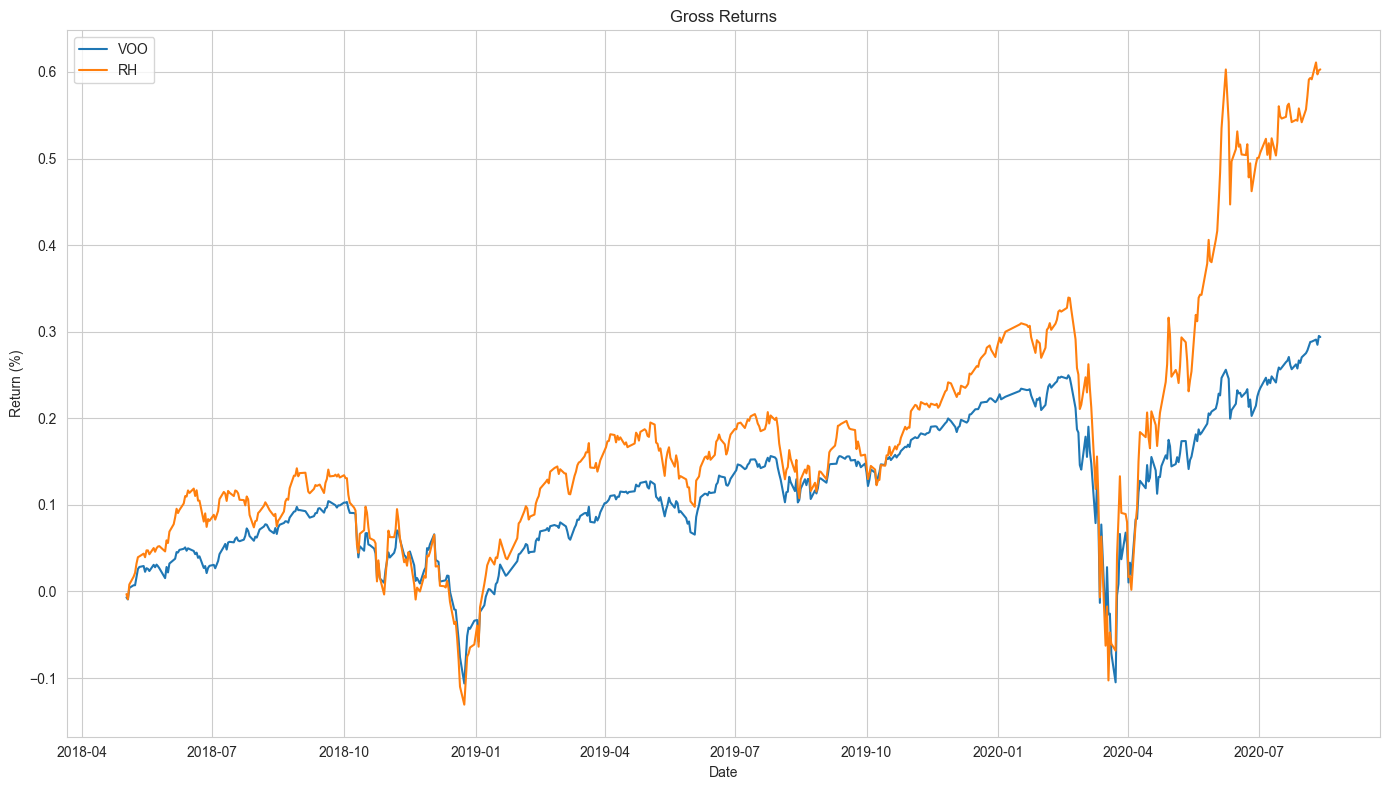

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(14, 8), sharex=True)

# Plot the first series (assuming 'cum' needs to be exponentiated)
sns.lineplot(x=df_voo.index, y=df_voo["ret"], label="VOO", ax=ax)

# Plot the second series (assuming 'ret' is already simple return)
sns.lineplot(x=df_plot.index, y=df_plot["cum"], label="RH", ax=ax)


plt.title("Gross Returns")
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.grid(True)
plt.legend()  # Add a legend to distinguish the lines
plt.tight_layout()
plt.show()

In [18]:
df_merged["daily_gross_returns"] = dl._compute_gross_returns(df_merged)  -1 
df_merged

KeyError: "['prc_adj'] not in index"

In [ ]:
df_merged[df_merged["ticker"]=="PLUG"]

,date,ticker,holders,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,holders_change_pct,...,total_holders,popularity,market_weight,retail_weight,total_holders_change_pct,total_holders_change_diff,rh_portfolio,daily_gross_returns,contribution,contribution_diff
464770,2019-01-02,PLUG,59255.375000,11.0,3388986.0,1.33,219158000.0,291480140.0,78809.648750,0.004797,...,7.348053e+06,0.010794,0.000010,0.000121,0.004015,29384.049819,0.014356,0.000000,0.000000,0.000000
464771,2019-01-03,PLUG,59391.608696,11.0,3637179.0,1.26,219158000.0,276139080.0,74833.426957,0.002296,...,7.379925e+06,0.010771,0.000009,0.000118,0.004338,31872.486413,0.013572,-0.052632,-0.000567,-inf
464772,2019-01-04,PLUG,59660.750000,11.0,4860884.0,1.34,219158000.0,293671720.0,79945.405000,0.004521,...,7.402981e+06,0.010786,0.000010,0.000120,0.003124,23055.463768,0.014453,0.007519,0.000081,-1.143054
464773,2019-01-07,PLUG,59790.333333,11.0,7501735.0,1.53,219158000.0,335311740.0,91479.210000,0.002170,...,7.409082e+06,0.010801,0.000011,0.000135,0.000824,6100.750000,0.016526,0.150376,0.001624,19.028634
464774,2019-01-08,PLUG,60442.833333,11.0,8682865.0,1.60,219158000.0,350652800.0,96708.533333,0.010854,...,7.443837e+06,0.010865,0.000011,0.000140,0.004691,34755.187500,0.017383,0.203008,0.002206,0.357906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465013,2019-12-24,PLUG,150018.000000,11.0,4776188.0,3.11,314468000.0,977995480.0,466555.980000,0.005142,...,1.041819e+07,0.019322,0.000025,0.000473,0.002211,22980.038949,0.060092,1.338346,0.025860,0.095595
465014,2019-12-26,PLUG,150414.652174,11.0,6227230.0,3.15,314468000.0,990574200.0,473806.154348,0.002641,...,1.043280e+07,0.019350,0.000025,0.000473,0.001402,14609.788043,0.060951,1.368421,0.026478,0.023924
465015,2019-12-27,PLUG,151043.958333,11.0,8395119.0,3.08,314468000.0,968561440.0,465215.391667,0.004175,...,1.045806e+07,0.019389,0.000025,0.000466,0.002421,25260.193841,0.059718,1.315789,0.025512,-0.036511
465016,2019-12-30,PLUG,151535.260870,11.0,7587277.0,3.08,314468000.0,968561440.0,466728.603478,0.003247,...,1.047890e+07,0.019421,0.000025,0.000472,0.001993,20837.989130,0.059816,1.315789,0.025553,0.001639


In [ ]:
df_last = df_merged.groupby("ticker").last()
df_last.sort_values("contribution")

,date,holders,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,holders_change_pct,holders_change_diff,total_holders,popularity,market_weight,retail_weight,total_holders_change_pct,total_holders_change_diff,rh_portfolio,daily_gross_returns,contribution,contribution_diff
ticker,,,,,,,,,,,,,,,,,,,,
XXII,2019-12-31,49074.375000,11.0,1918714.0,1.1000,1.257730e+08,1.383503e+08,5.398181e+04,0.000134,6.583333,1.050193e+07,0.006280,3.571392e-06,0.000054,0.002198,23033.76087,0.006908,-0.588015,-0.003692,-0.001416
PCG,2019-12-31,41824.333333,11.0,10593479.0,10.8700,5.292300e+08,5.752730e+09,4.546305e+05,-0.004601,-192.884058,1.050193e+07,0.005352,1.485017e-04,0.000458,0.002198,23033.76087,0.058175,-0.543277,-0.002908,-0.011485
TEUM,2019-12-31,28576.416667,11.0,6591106.0,0.4373,1.119040e+08,4.893562e+07,1.249647e+04,-0.000475,-13.583333,1.050193e+07,0.003657,1.263230e-06,0.000013,0.002198,23033.76087,0.001599,-0.750114,-0.002743,-0.028518
OGEN,2019-12-31,43966.125000,11.0,1233998.0,0.5230,4.612500e+07,2.412338e+07,2.299428e+04,-0.000970,-42.657609,1.050193e+07,0.005626,6.227238e-07,0.000023,0.002198,23033.76087,0.002942,-0.399058,-0.002245,-0.002805
VSTM,2019-12-31,17033.041667,11.0,1555664.0,1.3400,8.011800e+07,1.073581e+08,2.282428e+04,-0.000851,-14.500000,1.050193e+07,0.002180,2.771356e-06,0.000023,0.002198,23033.76087,0.002921,-0.628809,-0.001371,0.029343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLUG,2019-12-31,151787.166667,11.0,10102384.0,3.1600,3.033790e+08,9.586776e+08,4.796474e+05,0.001661,251.905797,1.050193e+07,0.019423,2.474742e-05,0.000483,0.002198,23033.76087,0.061376,1.375940,0.026725,0.045829
AMD,2019-12-31,168647.416667,11.0,31772346.0,45.8600,1.170000e+09,5.365620e+10,7.734171e+06,0.000307,51.764493,1.050193e+07,0.021580,1.385088e-03,0.007793,0.002198,23033.76087,0.989670,1.435475,0.030978,0.011480
SNAP,2019-12-31,165725.583333,11.0,18055249.0,16.3300,1.138349e+09,1.858924e+10,2.706299e+06,0.002303,381.208333,1.050193e+07,0.021206,4.798649e-04,0.002727,0.002198,23033.76087,0.346300,1.820380,0.038604,0.044349


In [ ]:
df_merged[df_merged["ticker"]=="KEQU"]

,date,ticker,holders,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,holders_change_pct,...,total_holders,popularity,market_weight,retail_weight,total_holders_change_pct,total_holders_change_diff,rh_portfolio,daily_gross_returns,contribution,contribution_diff
326386,2019-01-02,KEQU,54.833333,11.0,42011.0,31.980,2744000.0,87753120.0,1753.570000,0.102326,...,7.348053e+06,0.000010,2.892639e-06,2.697749e-06,0.004015,29384.049819,0.000319,0.000000,0.000000e+00,0.000000
326387,2019-01-03,KEQU,54.652174,11.0,13587.0,31.340,2744000.0,85996960.0,1712.799130,-0.003309,...,7.379925e+06,0.000010,2.897098e-06,2.707545e-06,0.004338,31872.486413,0.000311,-0.020013,-1.983564e-07,-inf
326388,2019-01-04,KEQU,53.791667,11.0,13837.0,31.965,2744000.0,87711960.0,1719.450625,-0.015870,...,7.402981e+06,0.000010,2.857574e-06,2.584929e-06,0.003124,23055.463768,0.000311,-0.000469,-4.561400e-09,-0.977004
326389,2019-01-07,KEQU,52.708333,11.0,16617.0,32.000,2744000.0,87808000.0,1686.666667,-0.020345,...,7.409082e+06,0.000010,2.835052e-06,2.486348e-06,0.000824,6100.750000,0.000305,0.000625,5.954980e-09,-2.305516
326390,2019-01-08,KEQU,52.291667,11.0,9430.0,32.500,2744000.0,89180000.0,1699.479167,-0.007937,...,7.443837e+06,0.000009,2.850088e-06,2.468439e-06,0.004691,34755.187500,0.000305,0.016260,1.528372e-07,24.665442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326629,2019-12-24,KEQU,63.958333,11.0,1159.0,13.010,2750000.0,35777500.0,832.097917,-0.012302,...,1.041819e+07,0.000008,9.250799e-07,8.439267e-07,0.002211,22980.038949,0.000107,-0.593183,-4.886508e-06,-0.013559
326630,2019-12-26,KEQU,64.043478,11.0,6443.0,13.110,2750000.0,36052500.0,839.610000,0.001330,...,1.043280e+07,0.000008,9.277890e-07,8.388208e-07,0.001402,14609.788043,0.000108,-0.590056,-4.861280e-06,-0.005163
326631,2019-12-27,KEQU,65.000000,11.0,18665.0,13.140,2750000.0,36135000.0,854.100000,0.014825,...,1.045806e+07,0.000008,9.309090e-07,8.549314e-07,0.002421,25260.193841,0.000110,-0.589118,-4.915469e-06,0.011147
326632,2019-12-30,KEQU,64.333333,11.0,92292.0,13.010,2750000.0,35777500.0,836.976667,-0.010309,...,1.047890e+07,0.000008,9.267174e-07,8.470844e-07,0.001993,20837.989130,0.000107,-0.593183,-4.890745e-06,-0.005030


In [ ]:
dl._load_crsp_data()
dl.df_crsp[dl.df_crsp["ticker"]=="NBY"]

2025-04-07 11:25:44,329 - src.data_loader - INFO - Loading CRSP data (data_loader.py:105)


,permno,date,shrcd,ticker,prc,vol,shrout,cfacpr,cfacshr,sprtrn,cfacshr_adj,cfacpr_adj,prc_adj,shrout_adj
3913073,92345,2018-05-02,11.0,NBY,3.1000,1199.0,17089.0,0.000816,0.000816,-0.007206,1.0,1.0,3.1000,17089000.0
3913074,92345,2018-05-03,11.0,NBY,3.1153,284.0,17089.0,0.000816,0.000816,-0.002254,1.0,1.0,3.1153,17089000.0
3913075,92345,2018-05-04,11.0,NBY,3.0900,11509.0,17089.0,0.000816,0.000816,0.012811,1.0,1.0,3.0900,17089000.0
3913076,92345,2018-05-07,11.0,NBY,3.0000,1968.0,17089.0,0.000816,0.000816,0.003458,1.0,1.0,3.0000,17089000.0
3913077,92345,2018-05-08,11.0,NBY,3.0450,7804.0,17089.0,0.000816,0.000816,-0.000266,1.0,1.0,3.0450,17089000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913644,92345,2020-08-07,11.0,NBY,1.1400,4349150.0,33377.0,0.000816,0.000816,0.000633,1.0,1.0,1.1400,33377000.0
3913645,92345,2020-08-10,11.0,NBY,1.1100,2021542.0,33377.0,0.000816,0.000816,0.002742,1.0,1.0,1.1100,33377000.0
3913646,92345,2020-08-11,11.0,NBY,1.0300,3941082.0,33377.0,0.000816,0.000816,-0.007969,1.0,1.0,1.0300,33377000.0
3913647,92345,2020-08-12,11.0,NBY,0.9560,3255991.0,33377.0,0.000816,0.000816,0.013997,1.0,1.0,0.9560,33377000.0


In [ ]:
import pandas as pd
df_crsp_new = pd.read_csv("../data/df_crsp_test.csv")
df_crsp_new

C:\Users\feder\AppData\Local\Temp\ipykernel_22628\3967508397.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/df_crsp_test.csv")


,PERMNO,date,SHRCD,TICKER,PRC,RET
0,10026,2018-05-02,11.0,JJSF,129.66000,-0.018248
1,10026,2018-05-03,11.0,JJSF,128.82001,-0.006478
2,10026,2018-05-04,11.0,JJSF,132.70000,0.030119
3,10026,2018-05-07,11.0,JJSF,135.05000,0.017709
4,10026,2018-05-08,11.0,JJSF,135.50000,0.003332
...,...,...,...,...,...,...
4182152,93436,2020-08-07,11.0,TSLA,1452.70996,-0.024752
4182153,93436,2020-08-10,11.0,TSLA,1418.56995,-0.023501
4182154,93436,2020-08-11,11.0,TSLA,1374.39001,-0.031144
4182155,93436,2020-08-12,11.0,TSLA,1554.76001,0.131236


In [ ]:
df_crsp_new["chg"] = df_crsp_new[["PRC", "PERMNO"]].groupby("PERMNO").pct_change()
df_crsp_new

C:\Users\feder\AppData\Local\Temp\ipykernel_22628\2449876786.py:1: FutureWarning: The default fill_method='ffill' in DataFrameGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["chg"] = df[["PRC", "PERMNO"]].groupby("PERMNO").pct_change()


,PERMNO,date,SHRCD,TICKER,PRC,RET,chg
0,10026,2018-05-02,11.0,JJSF,129.66000,-0.018248,NaN
1,10026,2018-05-03,11.0,JJSF,128.82001,-0.006478,-0.006478
2,10026,2018-05-04,11.0,JJSF,132.70000,0.030119,0.030119
3,10026,2018-05-07,11.0,JJSF,135.05000,0.017709,0.017709
4,10026,2018-05-08,11.0,JJSF,135.50000,0.003332,0.003332
...,...,...,...,...,...,...,...
4182152,93436,2020-08-07,11.0,TSLA,1452.70996,-0.024752,-0.024752
4182153,93436,2020-08-10,11.0,TSLA,1418.56995,-0.023501,-0.023501
4182154,93436,2020-08-11,11.0,TSLA,1374.39001,-0.031144,-0.031144
4182155,93436,2020-08-12,11.0,TSLA,1554.76001,0.131236,0.131236


2025-04-07 18:55:22,630 - src.data_loader - DEBUG - self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh.parquet (data_loader.py:53)
2025-04-07 18:55:22,631 - src.data_loader - DEBUG - self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_crsp_new.parquet (data_loader.py:54)
2025-04-07 18:55:22,632 - src.data_loader - DEBUG - self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_merged_drop.parquet (data_loader.py:55)
2025-04-07 18:55:22,632 - src.data_loader - INFO - Loading Robinhood data (data_loader.py:68)
2025-04-07 18:55:23,960 - src.data_loader - INFO - Loading CRSP data (data_loader.py:109)
2025-04-07 18:55:24,313 - src.data_loader - INFO - Merging... (data_loader.py:194)
2025-04-07 18:55:35,814 - src.data_loader - DEBUG - self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh.parquet (data_loader.py:53)
2025-04-07 18:55:35,827 - src.data_loader - DEBUG - self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_cr

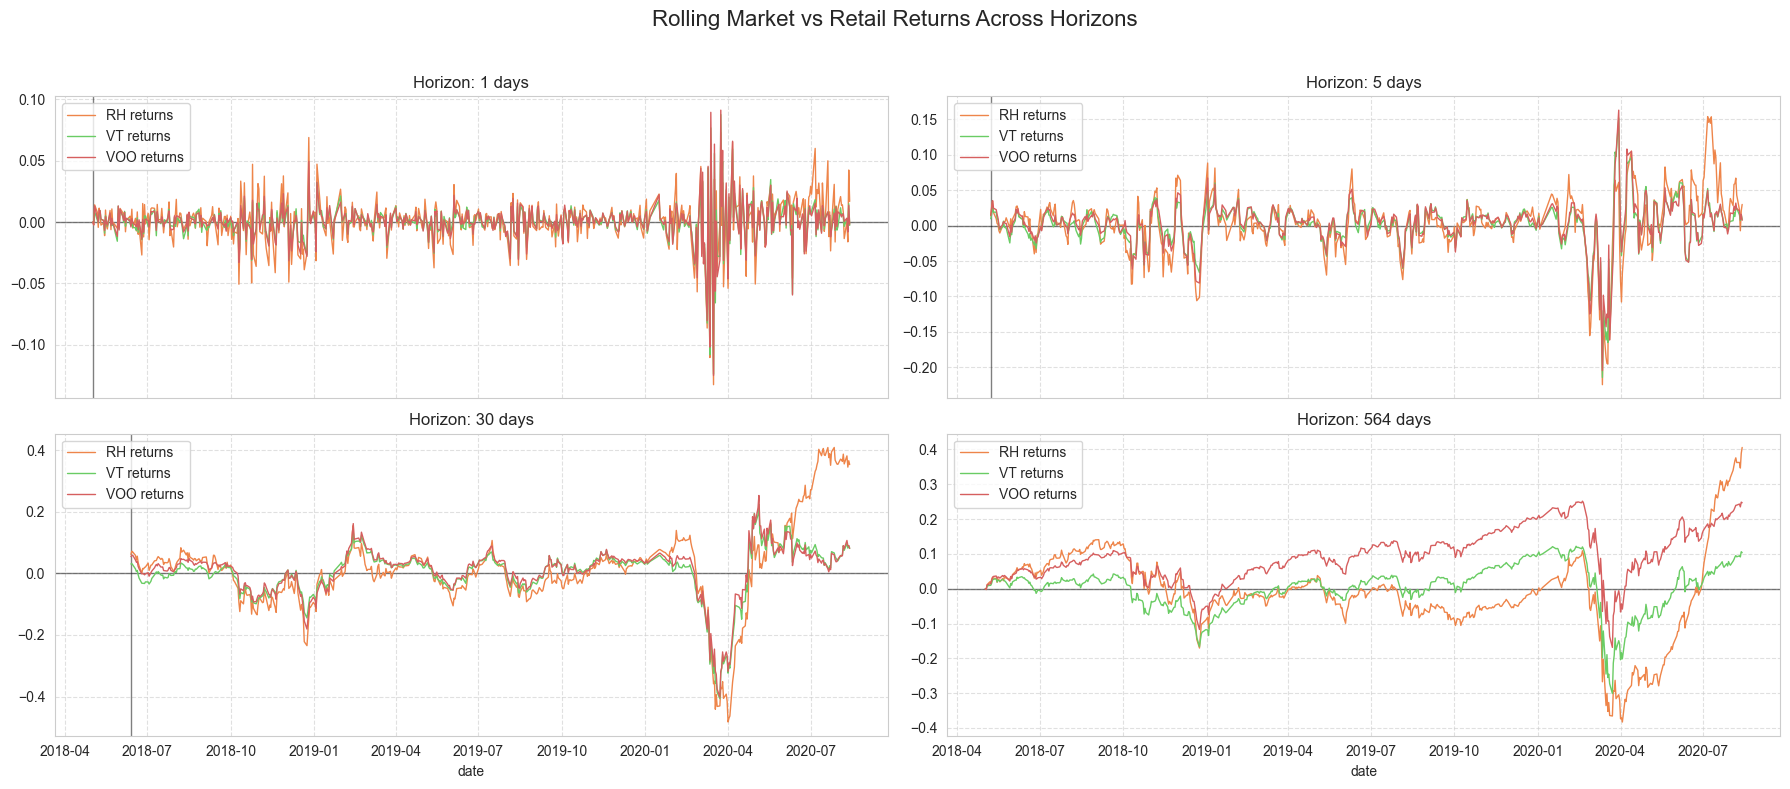

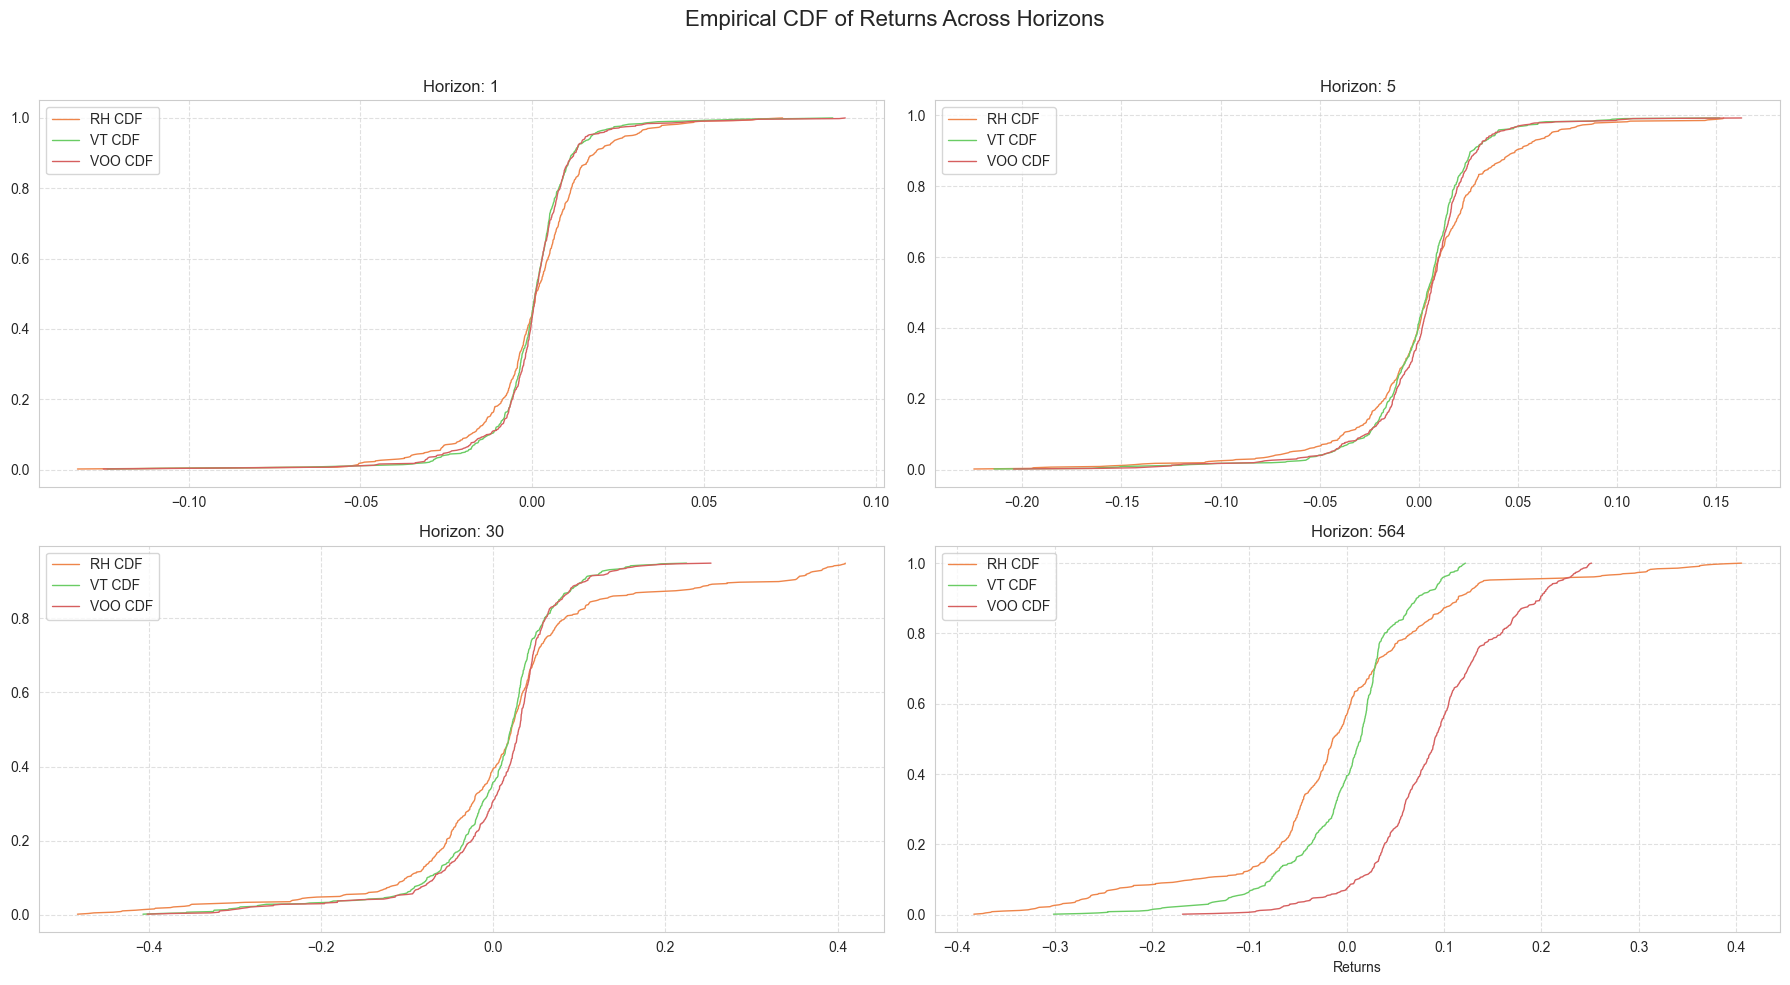

In [ ]:
from src import Analyzer

#return_params = {"horizons":[1, 5, 30, ], "start_date":"2019-01-01", "end_date":"2020-01-01", "cumulative":True, "append_start":False}
return_params = {"horizons":[1, 5, 30, ], "start_date":None, "end_date":None, "cumulative":True, "append_start":False}
an = Analyzer(return_params=return_params, dl_kwargs={"handle_nans":"drop", "load_merged":False})

an = Analyzer(compare_tickers=["VT", "VOO"], return_params=return_params)
an.plot_returns_timeseries()
an.plot_returns_cdfs()

In [ ]:
returns = an.build_returns()[0]
cols_to_keep = [col for col in returns.columns if col.endswith("return")]
returns = returns[cols_to_keep]
desc = returns.describe().T
desc["count"] = desc["count"].astype(int)
desc["positive returns"] = returns.gt(0).sum() / desc["count"]
desc.round(6)


,count,mean,std,min,25%,50%,75%,max,positive returns
rh_portfolio_1_return,248,0.000266,0.011026,-0.037240,-0.004718,0.000659,0.006496,0.047101,0.528226
VT_1_return,248,0.000863,0.007526,-0.029676,-0.003294,0.001149,0.004970,0.031957,0.592742
VOO_1_return,248,0.001015,0.007884,-0.030575,-0.002428,0.000939,0.005821,0.032474,0.584677
rh_portfolio_5_return,244,0.001381,0.020874,-0.076219,-0.010309,0.003071,0.013039,0.081205,0.577869
VT_5_return,244,0.004285,0.015840,-0.060518,-0.004924,0.005372,0.013855,0.060003,0.643443
VOO_5_return,244,0.005162,0.016005,-0.059524,-0.003220,0.006514,0.014766,0.058395,0.700820
rh_portfolio_30_return,219,-0.000296,0.040071,-0.105544,-0.029693,0.004045,0.029802,0.106776,0.520548
VT_30_return,219,0.019242,0.034168,-0.064460,-0.001418,0.026978,0.039823,0.122399,0.739726
VOO_30_return,219,0.024412,0.033462,-0.054869,-0.000762,0.030957,0.043946,0.133682,0.744292
rh_portfolio_248_return,248,0.049041,0.030477,-0.031478,0.027645,0.053521,0.074572,0.120061,0.931452


In [ ]:
levels = an.build_levels()
levels

,rh_portfolio,VT,VOO
date,,,
2018-05-02,96.041674,73.62,241.78000
2018-05-03,95.826112,73.59,241.21001
2018-05-04,97.179437,74.22,244.41000
2018-05-07,97.955565,74.33,245.17000
2018-05-08,97.534681,74.34,245.16000
...,...,...,...
2020-08-07,138.001671,80.69,307.35999
2020-08-10,138.034713,80.91,308.34000
2020-08-11,135.827047,80.66,305.85001
